# 案例7 模拟掷骰子

## 功能1.0 模拟和统计 
模拟掷骰子并且记录频数和频率

生成随机数的方法：
* choice(<list>) 从列表中随机返回一个值
* sample(<list>,k) 从列表中随机抽取k个值
* random模块的一系列ran函数

In [1]:
import numpy as np
import pandas as pd

enumerate 遍历列表，返回每个元素的索引和值

In [2]:
#模拟掷骰子
def roll_dic():
    roll = np.random.randint(1,7)
    return roll

In [3]:
#定义主函数
def main():
    total_times = 10000
    #初始化列表
    result_list = [0] * 6
    
    for i in range(total_times):
        roll = roll_dic()
        for j in range(1,7):
            if roll == j:
                result_list[j-1] += 1
    
    for i,x in enumerate(result_list):
        print('点数{}的次数：{}，频率：{}'.format(i + 1,x,x / total_times))

In [4]:
main()

点数1的次数：1644，频率：0.1644
点数2的次数：1633，频率：0.1633
点数3的次数：1664，频率：0.1664
点数4的次数：1708，频率：0.1708
点数5的次数：1672，频率：0.1672
点数6的次数：1679，频率：0.1679


## 功能2.0 同时模拟两个骰子
* 借助字典来储存模拟结果
* 借助zip()函数来生成字典

In [5]:
def main():
    total_times = 10000
    #初始化列表
    result_list = [0] * 11
    roll_list = list(range(2,13))
    #将键值对合并
    roll_dict = dict(zip(roll_list,result_list))
    
    for i in range(total_times):
        roll1 = roll_dic()
        roll2 = roll_dic()
        for j in range(2,13):
            if (roll1 + roll2) == j:
                roll_dict[j] += 1
    
    #i是字典的键，点数和；x是字典的值，点数和出现的次数
    for i,x in roll_dict.items():
        print('点数{}的次数：{}，频率：{}'.format(i,x,x / total_times))

In [6]:
main()

点数2的次数：274，频率：0.0274
点数3的次数：532，频率：0.0532
点数4的次数：865，频率：0.0865
点数5的次数：1109，频率：0.1109
点数6的次数：1393，频率：0.1393
点数7的次数：1572，频率：0.1572
点数8的次数：1389，频率：0.1389
点数9的次数：1101，频率：0.1101
点数10的次数：869，频率：0.0869
点数11的次数：590，频率：0.059
点数12的次数：306，频率：0.0306


## 功能3.0 结果可视化
matplotlib模块

In [7]:
from matplotlib import pyplot as plt

In [8]:
def main():
    total_times = 1000
    #记录掷骰子的结果
    roll1_list = []
    roll2_list = []
    
    for i in range(total_times):
        roll1 = roll_dic()
        roll2 = roll_dic()
        roll1_list.append(roll1)
        roll2_list.append(roll2)
    #可视化
    x = range(1,total_times + 1)
    plt.scatter(x,roll1_list,alpha=0.1)
    plt.scatter(x,roll2_list,alpha=0.1)
    plt.show()

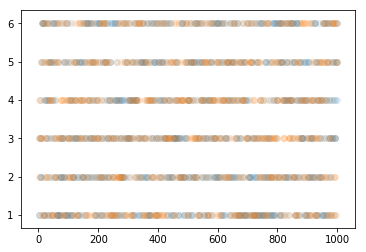

In [9]:
main()

## 功能4.0 简单的数据统计和分析
* 直方图

In [10]:
def main():
    total_times = 100000
    #记录掷骰子的结果
    roll_list = []
    
    for i in range(total_times):
        roll1 = roll_dic()
        roll2 = roll_dic()
        roll_list.append(roll1 + roll2)
    
    #可视化
    plt.hist(roll_list,bins = range(2,14),density = True,edgecolor = 'black',width = 1)
    plt.title('骰子点数统计图')
    plt.xlabel('点数')
    plt.ylabel('频率')
    plt.show()
#因为函数更新，现在用density代替normed参数

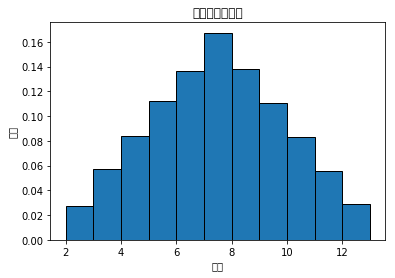

In [11]:
main()

In [12]:
#默认设置中的字体不支持中文输出，需要重新设置
plt.rcParams['font.sans-serif'] = ['SimHei']
#有时负号也会存在问题
plt.rcParams['axes.unicode_minus'] = False

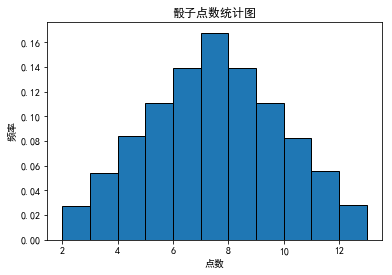

In [13]:
main()

## 功能5.0 使用科学计算库简化程序

In [14]:
def main():
    total_times = 10000
    #直接借助numpy生成随机数矩阵
    roll1_arr = np.random.randint(1,7,total_times)
    roll2_arr = np.random.randint(1,7,total_times)
    roll_arr = roll1_arr + roll2_arr
    #np中的可视化
    hist , bins =np.histogram(roll_arr,bins = range(2,14))
    print(hist,'\n',bins)
    #修改坐标标签
    tick_labels = ['2点','3点','4点','5点','6点','7点',
                   '8点','9点','10点','11点','12点']
    tick_pos = np.arange(2,14) + 0.5
    plt.xticks(tick_pos,tick_labels)
    
    plt.hist(roll_arr,bins = range(2,14),density = True,edgecolor = 'black',linewidth = 1,rwidth = 0.8)
    plt.title('骰子点数统计图')
    plt.xlabel('点数')
    plt.ylabel('频率')
    
    plt.show()

[ 293  542  878 1098 1356 1713 1359 1141  781  580  259] 
 [ 2  3  4  5  6  7  8  9 10 11 12 13]


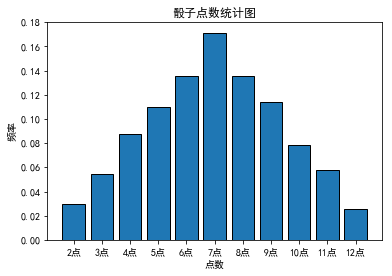

In [15]:
main()

## 课后思考
掷3个骰子的可视化

In [16]:
def main():
    total_times = 10000

    roll1_arr = np.random.randint(1,7,total_times)
    roll2_arr = np.random.randint(1,7,total_times)
    roll3_arr = np.random.randint(1,7,total_times)
    roll_arr = roll1_arr + roll2_arr + roll3_arr

    tick_labels = ['3点','4点','5点','6点','7点',
                   '8点','9点','10点','11点','12点',
                   '13点','14点','15点','16点','17点','18点']
    tick_pos = np.arange(3,20) + 0.5
    plt.xticks(tick_pos,tick_labels)
    
    plt.hist(roll_arr,bins = range(3,20),density = True,edgecolor = 'black',linewidth = 1,rwidth = 0.8)
    plt.title('骰子点数统计图')
    plt.xlabel('点数')
    plt.ylabel('频率')
    
    plt.show()

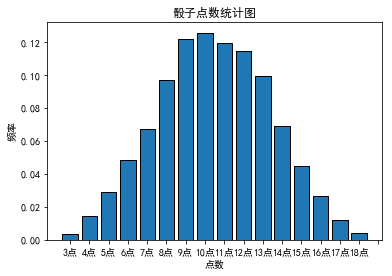

In [17]:
main()